In [2]:
!pip install openpyxl
!pip install tabulate

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from google.colab import files
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Upload the Excel file
uploaded = files.upload()
file_name = next(iter(uploaded))

# Load the dataset
df = pd.read_excel(io.BytesIO(uploaded[file_name]), sheet_name='Sheet1')

# Display initial info about the dataset
print("Initial dataset info:")
print(df.info())

Saving RTA Data 2020 to July 2023.xlsx to RTA Data 2020 to July 2023 (2).xlsx
Initial dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46189 entries, 0 to 46188
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   EcYear                    46189 non-null  object        
 1   EcNumber                  38978 non-null  object        
 2   CallTime                  40233 non-null  datetime64[ns]
 3   EmergencyArea             46188 non-null  object        
 4   TotalPatientsInEmergency  46189 non-null  object        
 5   Gender                    46188 non-null  object        
 6   Age                       46188 non-null  float64       
 7   HospitalName              24239 non-null  object        
 8   Reason                    46188 non-null  object        
 9   responsetime              46184 non-null  float64       
 10  EducationTitle            46188 non-null  

In [3]:
df.head()

,EcYear,EcNumber,CallTime,EmergencyArea,TotalPatientsInEmergency,Gender,Age,HospitalName,Reason,responsetime,...,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved
0,2020,31486,2020-12-31 22:41:47,NEAR APS SCHOOL FORT ROAD RWP,1,Male,27.0,BBH,Bike Slip,10.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020,31485,2020-12-31 22:25:00,"Infront of Daig.com, Near Dha gate 2, gt road...",1,Male,20.0,NaN,Car hit Footpath,12.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020,31483,2020-12-31 21:54:59,Muhammadi chowk arshad bakery khyaban e sirsye...,1,Male,48.0,BBH,Rickshaw hit with Car,10.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2020,31482,2020-12-31 21:24:22,"Gulzar e quaid, T/W Katcheri Near Attock Pump,...",1,Male,45.0,NaN,Car hit Car and runaway,5.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020,31479,2020-12-31 21:03:49,Taaj Company Gawalmandi Chowk Liaqat Baag Road...,1,Male,22.0,NaN,Unknown Bike hit Bike and runaway,5.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.shape

(46189, 25)

In [5]:
df.columns

Index(['EcYear', 'EcNumber', 'CallTime', 'EmergencyArea',
       'TotalPatientsInEmergency', 'Gender', 'Age', 'HospitalName', 'Reason',
       'responsetime', 'EducationTitle', 'InjuryType', 'Cause',
       'PatientStatus', 'BicycleInvovled', 'BikesInvolved', 'BusesInvolved',
       'CarsInvolved', 'CartInvovled', 'RickshawsInvolved', 'TractorInvovled',
       'TrainsInvovled', 'TrucksInvolved', 'VansInvolved', 'OthersInvolved'],
      dtype='object')

**Pre-Processing Steps**

In [3]:
#finding missing values
df.isnull().sum()

,0
EcYear,0
EcNumber,7211
CallTime,5956
EmergencyArea,1
TotalPatientsInEmergency,0
Gender,1
Age,1
HospitalName,21950
Reason,1
responsetime,5


In [4]:
df.isnull().sum().sum()

35155

In [5]:
# Calculate the percentage of missing values in each row
df['Missing%'] = df.isnull().sum(axis=1) / len(df.columns) * 100

print(df['Missing%'])

0        0.0
1        4.0
2        0.0
3        4.0
4        4.0
        ... 
46184    8.0
46185    0.0
46186    4.0
46187    4.0
46188    4.0
Name: Missing%, Length: 46189, dtype: float64


In [6]:
# Filter out rows with more than 25% missing values
df_filtered = df[df['Missing%'] <= 25]

df_filtered.shape

(46187, 26)

In [7]:
# Dropping the Missing% Column
df_filtered.drop('Missing%', axis=1, inplace=True)

In [11]:
df_filtered.shape

(46187, 25)

In [12]:
#finding duplicates
df_filtered.duplicated().sum()

8

In [8]:
#remove duplicates values
df_filtered.drop_duplicates()

,EcYear,EcNumber,CallTime,EmergencyArea,TotalPatientsInEmergency,Gender,Age,HospitalName,Reason,responsetime,...,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved
0,2020,31486,2020-12-31 22:41:47,NEAR APS SCHOOL FORT ROAD RWP,1,Male,27.0,BBH,Bike Slip,10.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020,31485,2020-12-31 22:25:00,"Infront of Daig.com, Near Dha gate 2, gt road...",1,Male,20.0,NaN,Car hit Footpath,12.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020,31483,2020-12-31 21:54:59,Muhammadi chowk arshad bakery khyaban e sirsye...,1,Male,48.0,BBH,Rickshaw hit with Car,10.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2020,31482,2020-12-31 21:24:22,"Gulzar e quaid, T/W Katcheri Near Attock Pump,...",1,Male,45.0,NaN,Car hit Car and runaway,5.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020,31479,2020-12-31 21:03:49,Taaj Company Gawalmandi Chowk Liaqat Baag Road...,1,Male,22.0,NaN,Unknown Bike hit Bike and runaway,5.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46184,2023,NaN,NaT,Infront Of Mian G hotel GT Road Mandra,2,Male,20.0,"RHC,Mandra,Rawalpindi",.,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
46185,2023,356986,2023-01-01 04:23:00,"Barma Shell Depu Dhoke Munshi Road, Fazal Town...",1,Male,16.0,DHQ,Bike slipped due to over speed.(RIN.6276) C D...,11.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46186,2023,356981,2023-01-01 02:16:00,Main Bakra Mandi Chowk Rwp,1,Female,10.0,NaN,RLF-2193 coure and ICT-593 corolla car colliped,1.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46187,2023,356980,2023-01-01 02:02:00,"Darbar Adda, Mandi Morr, Bus Stop, Ijp Road, Rwp",1,Male,19.0,NaN,Bike slipped due to Over speed ( Bike no TSH ...,12.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Check number of rows before and after
print("Rows before removing duplicates:", len(df_filtered))
df_filtered = df_filtered.drop_duplicates()
print("Rows after removing duplicates:", len(df_filtered))

Rows before removing duplicates: 46187
Rows after removing duplicates: 46179


In [15]:
df_filtered.duplicated().sum()

0

**Replace the Missing Values in the Remaining Rows using ffill, bfill, mean, median, mode, Interpolation**

In [9]:
#1. using Forward Fill for HospitalName
df_filtered['HospitalName'] = df_filtered['HospitalName'].ffill(axis=None, inplace=False, limit=None)

#2. using Backward Fill for Gender
df_filtered['Gender'] = df_filtered['Gender'].bfill(axis=None, inplace=False, limit=None)

#3. using Mean value for Age
df_filtered['Age'] = df_filtered['Age'].fillna(df_filtered['Age'].mean())

#4. using Median value for responsetime
df_filtered['responsetime'] = df_filtered['responsetime'].fillna(df_filtered['responsetime'].median())

#5. using Mode value for EmergencyArea
df_filtered['EmergencyArea'] = df_filtered['EmergencyArea'].fillna(df_filtered['EmergencyArea'].mode()[0])

#6. Interpolating the missing EcNumber
df_filtered['EcNumber'] = df_filtered['EcNumber'].infer_objects().interpolate(method='linear')

In [10]:
# Drop rows where PatientStatus is missing
df_filtered = df_filtered[df_filtered['PatientStatus'].notna()]

df_filtered.shape

(46187, 25)

In [18]:
df_filtered.isnull().sum()

,0
EcYear,0
EcNumber,0
CallTime,5948
EmergencyArea,0
TotalPatientsInEmergency,0
Gender,0
Age,0
HospitalName,0
Reason,0
responsetime,0


In [19]:
# Checking Unique values
df_filtered.nunique()

,0
EcYear,4
EcNumber,41358
CallTime,40168
EmergencyArea,37518
TotalPatientsInEmergency,12
Gender,3
Age,100
HospitalName,161
Reason,23939
responsetime,68


In [20]:
#finding garbage value
for i in df_filtered.select_dtypes(include="object").columns:
  print(df_filtered[i].value_counts())
  print("***"*10)

EcYear
2022    12900
2021    12674
2020    11379
2023     9226
Name: count, dtype: int64
******************************
EmergencyArea
 Railway Track Underpass Nazar Chowk Near Kacheri, Rwp.       43
 Cod Chowk Adyala Road Rawalpindi                             38
 502 Chowk, Adyala Road, Rwp                                  33
Near Pc Hotel Signal Mall Road Rwp                            31
 22 No. Chungi Damiyal Road, Main Chowk, Rawalpindi           29
                                                              ..
Jinnah Park Railway Track Rwp                                  1
Abid Majeed Road Front of CSD Rwp                              1
22 No Stop Rwp                                                 1
OPP Foot Streed Double Road Rwp                                1
Near Rehmanabad Metro Station T/W Faizabad Murree Road Rwp     1
Name: count, Length: 37518, dtype: int64
******************************
TotalPatientsInEmergency
1     36151
2      7312
3      1580
4       482
5     

**Converting DataTypes**

In [11]:
# Convert 'EcYear' to numeric, setting non-numeric values to NaN
df_filtered['EcYear'] = pd.to_numeric(df_filtered['EcYear'], errors='coerce')

# Keep only valid years
valid_years = [2020, 2021, 2022, 2023]
df_filtered['EcYear'] = df_filtered['EcYear'].apply(lambda x: x if x in valid_years else np.nan)

# Convert 'EcNumber' to numeric, setting non-numeric values to NaN
df_filtered['EcNumber'] = pd.to_numeric(df_filtered['EcNumber'], errors='coerce')

# Convert 'TotalPatientsInEmergency' to numeric, setting non-numeric values to NaN
df_filtered['TotalPatientsInEmergency'] = pd.to_numeric(df_filtered['TotalPatientsInEmergency'], errors='coerce')

df_filtered['CallTime'] = pd.to_datetime(df_filtered['CallTime'])
reference_date = df_filtered['CallTime'].min()
df_filtered['CallTime'] = (df_filtered['CallTime'] - reference_date).dt.total_seconds()
df_filtered['CallTime'] = df_filtered['CallTime'].fillna(method='ffill')

# Function to replace 'Same' with previous non-'Same' value
def replace_same(column):
    mask = column.str.lower().str.strip() == 'same'
    column.loc[mask] = np.nan
    return column.fillna(method='ffill')

# Apply the function to replace 'Same' in the Reason column
df_filtered['Reason'] = replace_same(df_filtered['Reason'])

In [22]:
df_filtered.isnull().sum()

,0
EcYear,0
EcNumber,0
CallTime,0
EmergencyArea,0
TotalPatientsInEmergency,0
Gender,0
Age,0
HospitalName,0
Reason,0
responsetime,0


In [23]:
#finding garbage value after converting
for i in df_filtered.select_dtypes(include="object").columns:
  print(df_filtered[i].value_counts())
  print("***"*10)

EmergencyArea
 Railway Track Underpass Nazar Chowk Near Kacheri, Rwp.       43
 Cod Chowk Adyala Road Rawalpindi                             38
 502 Chowk, Adyala Road, Rwp                                  33
Near Pc Hotel Signal Mall Road Rwp                            31
 22 No. Chungi Damiyal Road, Main Chowk, Rawalpindi           29
                                                              ..
Jinnah Park Railway Track Rwp                                  1
Abid Majeed Road Front of CSD Rwp                              1
22 No Stop Rwp                                                 1
OPP Foot Streed Double Road Rwp                                1
Near Rehmanabad Metro Station T/W Faizabad Murree Road Rwp     1
Name: count, Length: 37518, dtype: int64
******************************
Gender
Male      39788
Female     6390
Other         1
Name: count, dtype: int64
******************************
HospitalName
BBH                                       14195
DHQ                       

In [24]:
df_filtered.columns

Index(['EcYear', 'EcNumber', 'CallTime', 'EmergencyArea',
       'TotalPatientsInEmergency', 'Gender', 'Age', 'HospitalName', 'Reason',
       'responsetime', 'EducationTitle', 'InjuryType', 'Cause',
       'PatientStatus', 'BicycleInvovled', 'BikesInvolved', 'BusesInvolved',
       'CarsInvolved', 'CartInvovled', 'RickshawsInvolved', 'TractorInvovled',
       'TrainsInvovled', 'TrucksInvolved', 'VansInvolved', 'OthersInvolved'],
      dtype='object')

**Numerical Features before the Outlier Removal**

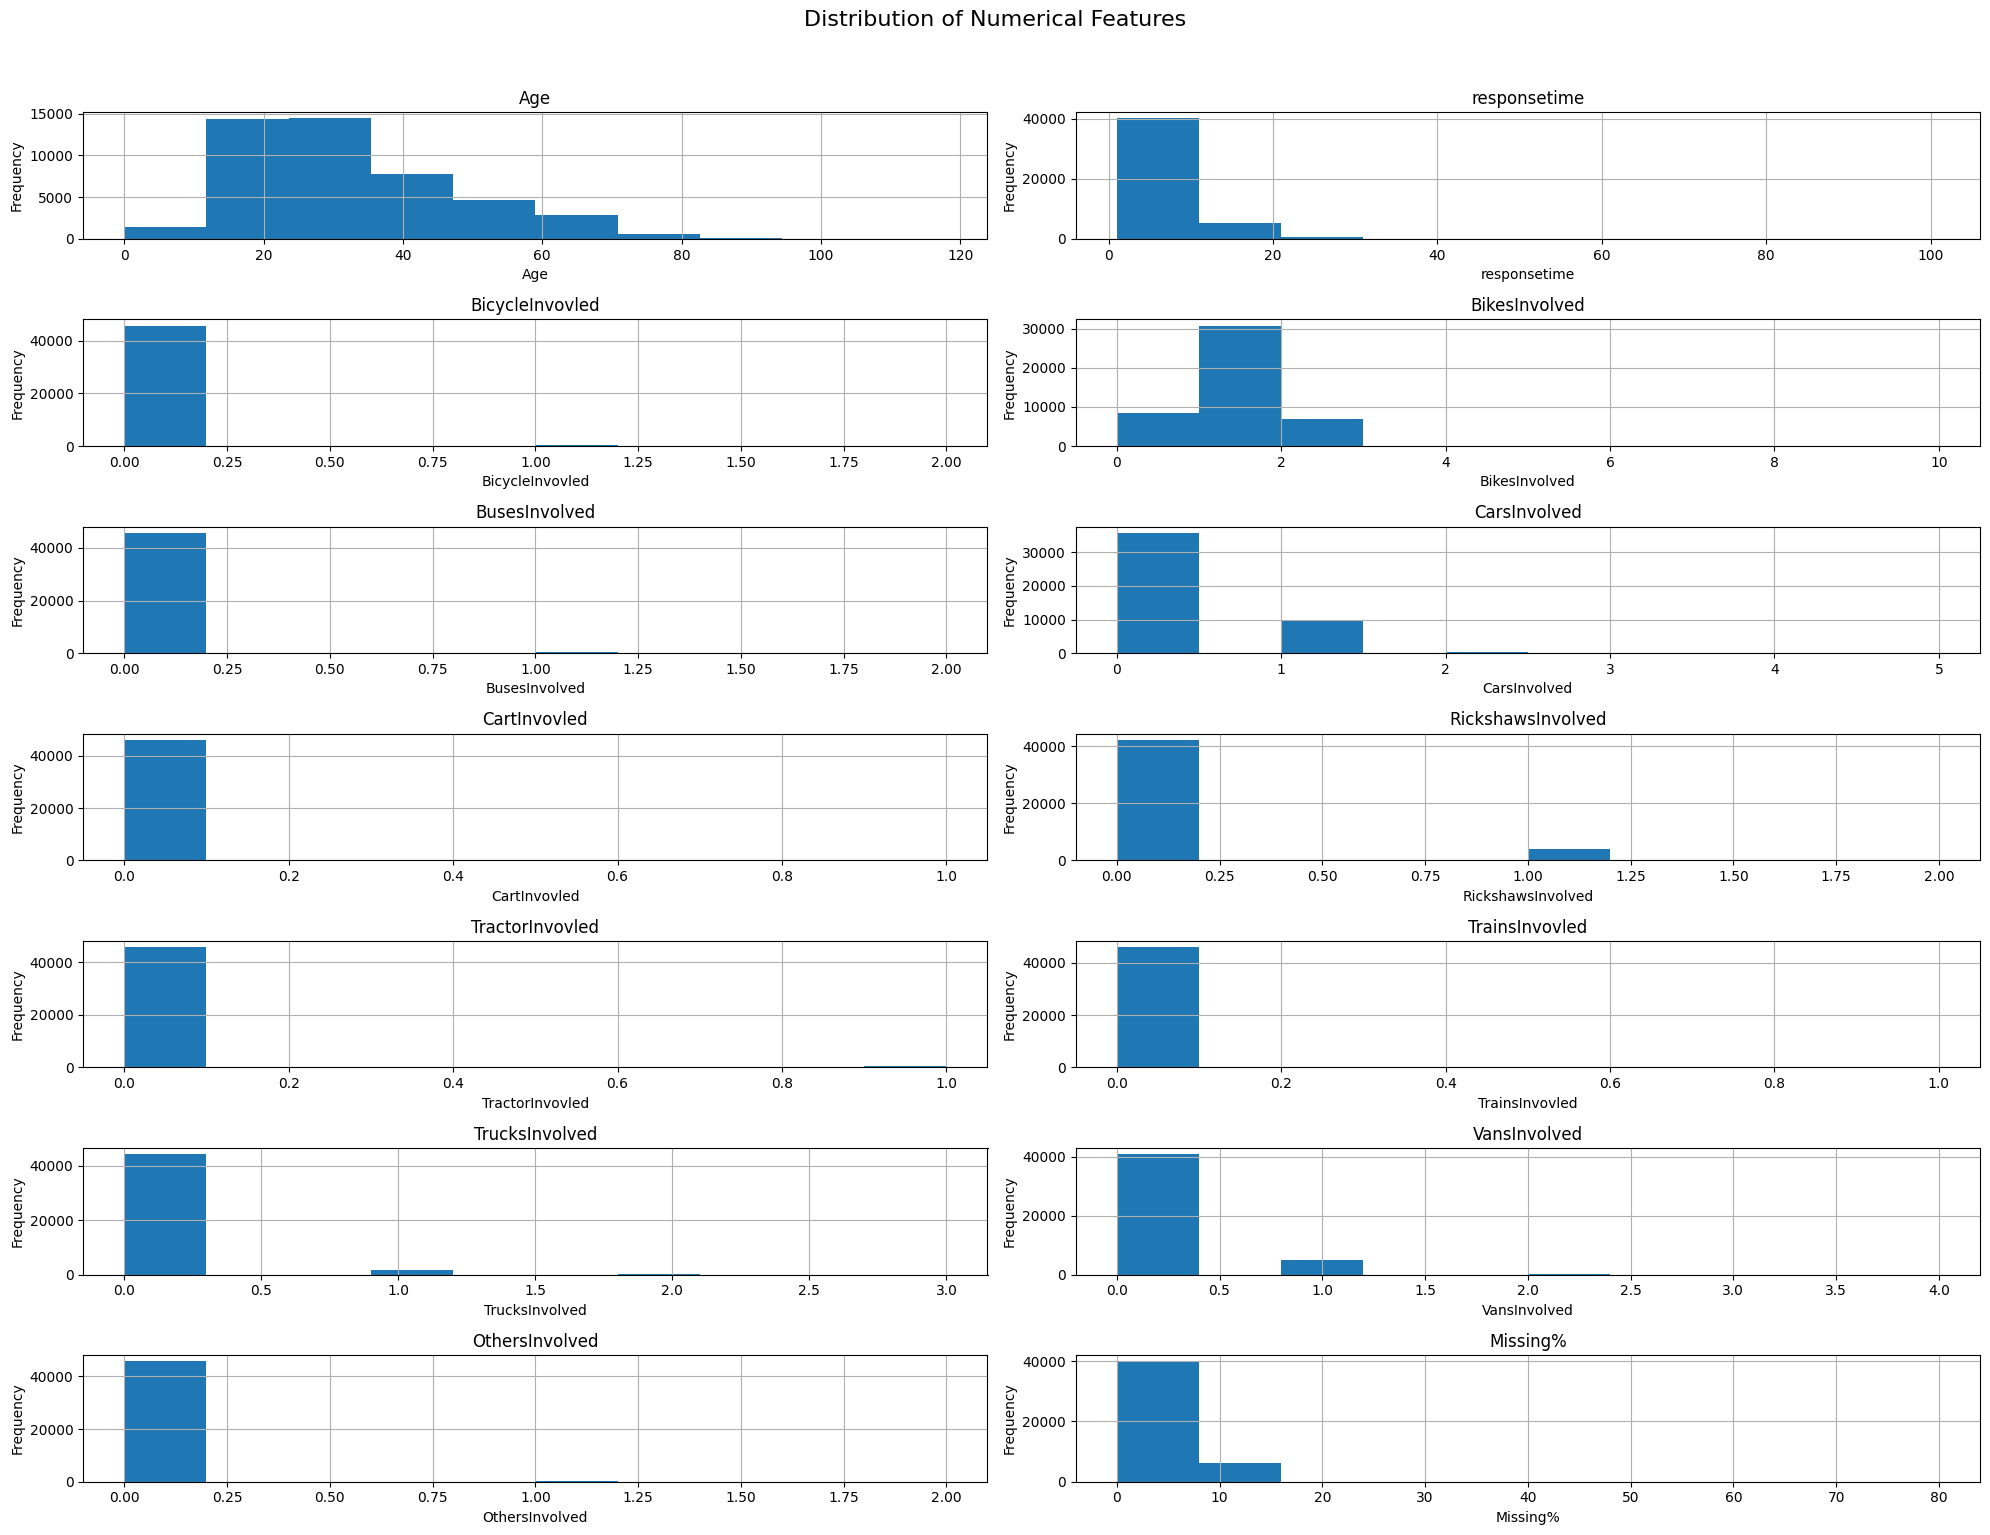

In [25]:
# Distribution of numerical features before Outlier Removal
numeric_df = df.select_dtypes(include=[np.number])
fig, axes = plt.subplots(nrows=(len(numeric_df.columns) + 1) // 2, ncols=2, figsize=(20, 15))
fig.suptitle('Distribution of Numerical Features', y=1.02, fontsize=16)

for i, column in enumerate(numeric_df.columns):
    ax = axes[i // 2, i % 2]
    numeric_df[column].hist(ax=ax)
    ax.set_title(column)
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

**Outlier Treatment**

In [12]:
# Function to remove outliers based on the IQR method
numerical_cols = df_filtered.select_dtypes(include=[np.number]).columns.tolist()

def remove_outliers(df_filtered, cols):
    for col in cols:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
        Q1 = df_filtered[col].quantile(0.25)
        Q3 = df_filtered[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define the lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter the dataset to exclude outliers
        df_filtered = df_filtered[(df_filtered[col] >= lower_bound) & (df_filtered[col] <= upper_bound)]

    return df_filtered

# Remove outliers from the numerical columns
df_cleaned = remove_outliers(df_filtered, numerical_cols)

print(df_cleaned.head().to_markdown(index=False, numalign="left", stralign="left"))

# Display the shape of the dataset before and after outlier removal
df.shape, df_cleaned.shape

| EcYear   | EcNumber   | CallTime    | EmergencyArea                                         | TotalPatientsInEmergency   | Gender   | Age   | HospitalName   | Reason                                                  | responsetime   | EducationTitle   | InjuryType      | Cause        | PatientStatus    | BicycleInvovled   | BikesInvolved   | BusesInvolved   | CarsInvolved   | CartInvovled   | RickshawsInvolved   | TractorInvovled   | TrainsInvovled   | TrucksInvolved   | VansInvolved   | OthersInvolved   |
|:---------|:-----------|:------------|:------------------------------------------------------|:---------------------------|:---------|:------|:---------------|:--------------------------------------------------------|:---------------|:-----------------|:----------------|:-------------|:-----------------|:------------------|:----------------|:----------------|:---------------|:---------------|:--------------------|:------------------|:-----------------|:-----------------|:----------

((46189, 26), (14547, 25))

**Neumerical Features after the Outlier Removal**

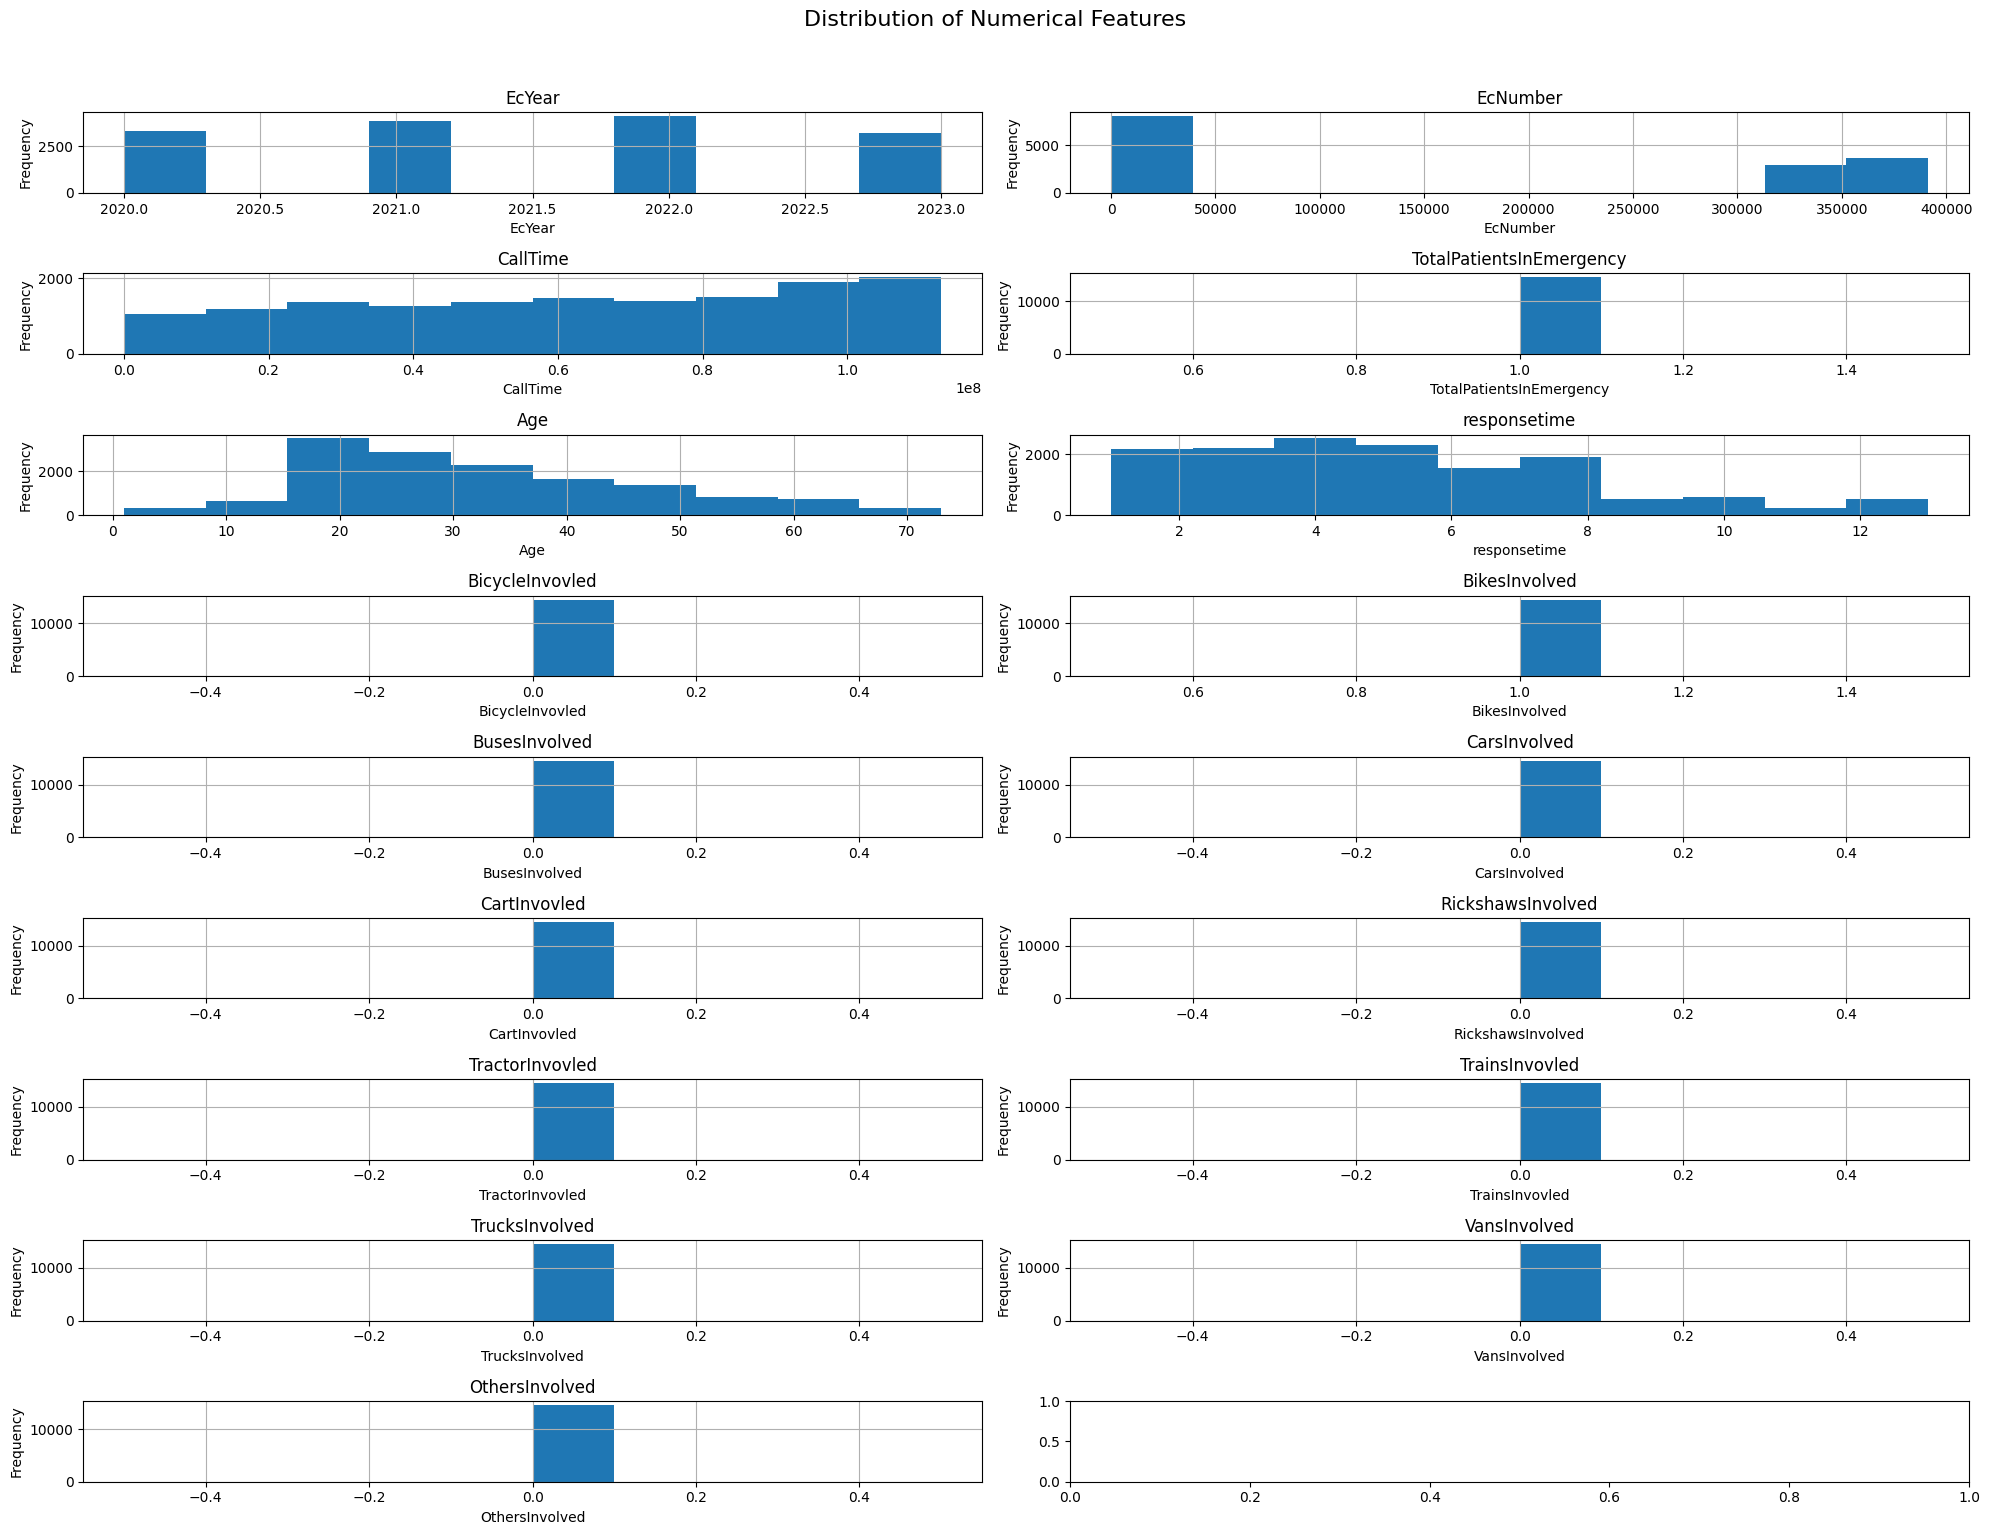

In [27]:
# Distribution of numerical features After Outlier Removal
numeric_df = df_cleaned.select_dtypes(include=[np.number])
fig, axes = plt.subplots(nrows=(len(numeric_df.columns) + 1) // 2, ncols=2, figsize=(20, 15))
fig.suptitle('Distribution of Numerical Features', y=1.02, fontsize=16)

for i, column in enumerate(numeric_df.columns):
    ax = axes[i // 2, i % 2]
    numeric_df[column].hist(ax=ax)
    ax.set_title(column)
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [28]:
df_cleaned.columns

Index(['EcYear', 'EcNumber', 'CallTime', 'EmergencyArea',
       'TotalPatientsInEmergency', 'Gender', 'Age', 'HospitalName', 'Reason',
       'responsetime', 'EducationTitle', 'InjuryType', 'Cause',
       'PatientStatus', 'BicycleInvovled', 'BikesInvolved', 'BusesInvolved',
       'CarsInvolved', 'CartInvovled', 'RickshawsInvolved', 'TractorInvovled',
       'TrainsInvovled', 'TrucksInvolved', 'VansInvolved', 'OthersInvolved'],
      dtype='object')

**Feature Scaling**

In [13]:
scaler = StandardScaler()
df_cleaned[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])

# Check the normalized data
print("Dataset after normalization:")
df_cleaned[numerical_cols].head()

Dataset after normalization:


,EcYear,EcNumber,CallTime,TotalPatientsInEmergency,Age,responsetime,BicycleInvovled,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved
0,-1.393643,-0.799182,-0.934973,0.0,-0.357181,1.761890,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,-1.393643,-0.799253,-0.935260,0.0,-0.965991,-0.053384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,-1.393643,-0.799294,-0.935403,0.0,-0.492472,-0.416438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,-1.393643,-0.799306,-0.935450,0.0,-0.965991,-0.416438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,-1.393643,-0.799400,-0.935817,0.0,1.266310,-1.142548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
df_cleaned.shape

(14547, 25)

In [14]:
label_encoder = LabelEncoder()

# Get the list of categorical columns
categorical_cols = df_cleaned.select_dtypes(include=[object]).columns.tolist()

# Label encode binary categorical columns
binary_cols = [col for col in categorical_cols if df_cleaned[col].nunique() == 2]
for col in binary_cols:
    df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col])

#Spearate target variables from features
target_cols = ['PatientStatus', 'InjuryType']

#Label Encode Target Cols
for col in target_cols:
    df_cleaned[col] = LabelEncoder().fit_transform(df_cleaned[col])

feature_cols = [col for col in categorical_cols if col not in target_cols and df_cleaned[col].nunique() > 2]

# One-hot encode multi-category columns
df_cleaned = pd.get_dummies(df_cleaned, columns=feature_cols, drop_first=True)

# Check the encoded data
df_cleaned.head()

,EcYear,EcNumber,CallTime,TotalPatientsInEmergency,Gender,Age,responsetime,InjuryType,PatientStatus,BicycleInvovled,...,EducationTitle_Masters,EducationTitle_Matric,EducationTitle_Middle,EducationTitle_Primary,Cause_One Wheeling,Cause_Others,Cause_Over Speed,Cause_Tyre Burst,Cause_U Turn,Cause_Wrong Turn
0,-1.393643,-0.799182,-0.934973,0.0,1,-0.357181,1.761890,1,1,0.0,...,False,False,False,False,False,False,True,False,False,False
6,-1.393643,-0.799253,-0.935260,0.0,1,-0.965991,-0.053384,0,1,0.0,...,False,True,False,False,False,False,True,False,False,False
7,-1.393643,-0.799294,-0.935403,0.0,1,-0.492472,-0.416438,3,1,0.0,...,False,False,False,True,False,False,False,False,False,False
8,-1.393643,-0.799306,-0.935450,0.0,1,-0.965991,-0.416438,3,1,0.0,...,False,True,False,False,False,False,False,False,False,False
14,-1.393643,-0.799400,-0.935817,0.0,1,1.266310,-1.142548,1,1,0.0,...,False,False,False,True,False,False,False,False,False,False


In [32]:
df_cleaned.shape

(14547, 21514)

**Before PreProcessing & After PreProcessing Comparison**

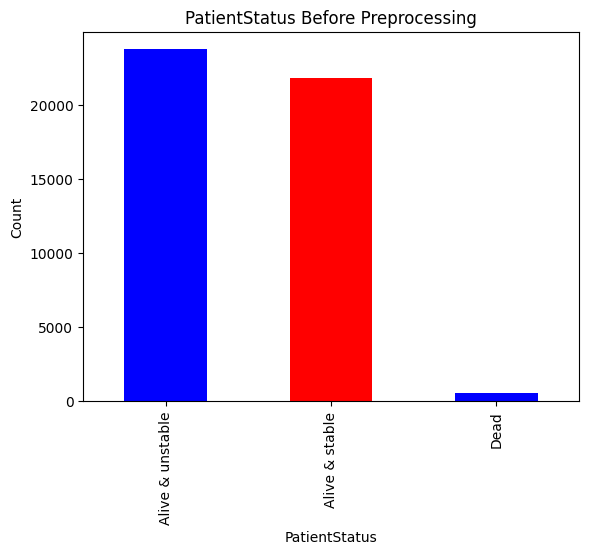

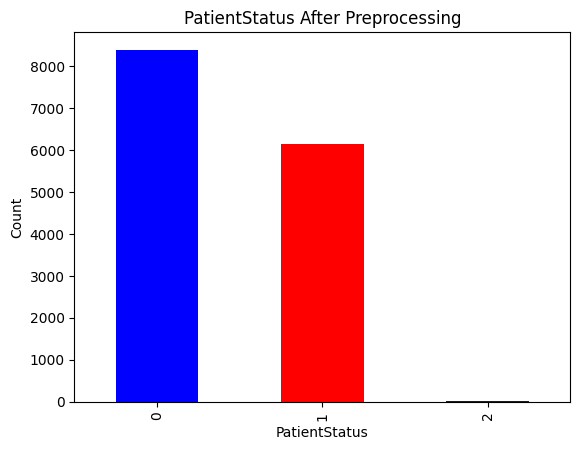

In [33]:
df['PatientStatus'].value_counts().plot(kind='bar', color=['blue', 'red'])

plt.title('PatientStatus Before Preprocessing')
plt.xlabel('PatientStatus')
plt.ylabel('Count')
plt.show()

df_cleaned['PatientStatus'].value_counts().plot(kind='bar', color=['blue', 'red'])

plt.title('PatientStatus After Preprocessing')
plt.xlabel('PatientStatus')
plt.ylabel('Count')
plt.show()

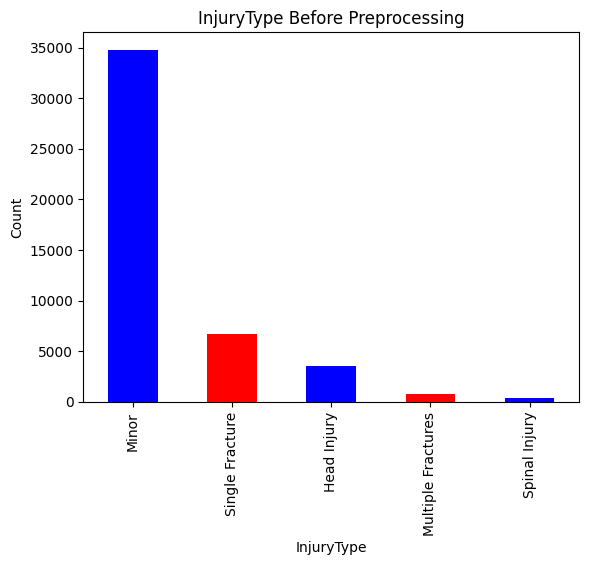

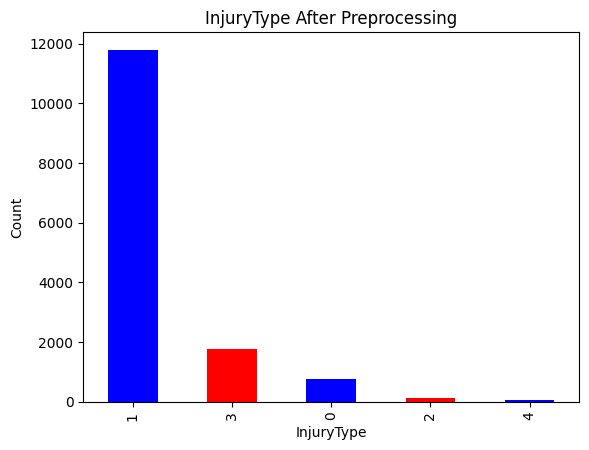

In [34]:
df['InjuryType'].value_counts().plot(kind='bar', color=['blue', 'red'])

plt.title('InjuryType Before Preprocessing')
plt.xlabel('InjuryType')
plt.ylabel('Count')
plt.show()

df_cleaned['InjuryType'].value_counts().plot(kind='bar', color=['blue', 'red'])

plt.title('InjuryType After Preprocessing')
plt.xlabel('InjuryType')
plt.ylabel('Count')
plt.show()

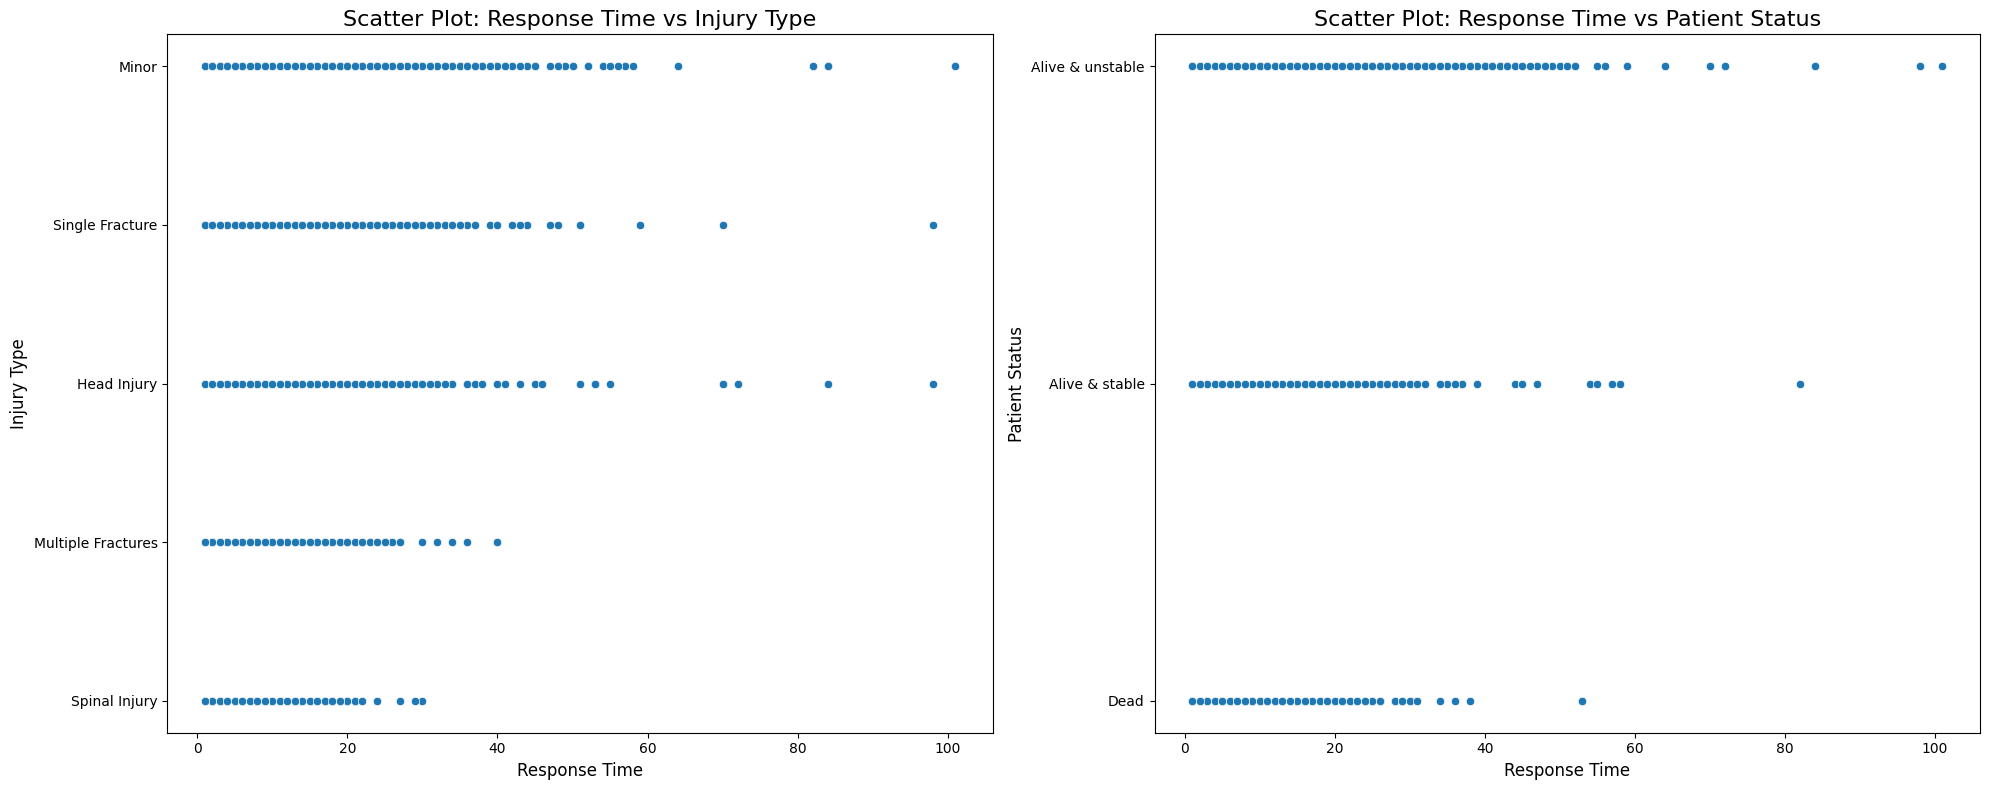

In [35]:
# Scatter plots for targets before PreProcessing
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Scatter plot for Injury Type
sns.scatterplot(data=df, x='responsetime', y='InjuryType', ax=ax1)
ax1.set_title('Scatter Plot: Response Time vs Injury Type', fontsize=16)
ax1.set_xlabel('Response Time', fontsize=12)
ax1.set_ylabel('Injury Type', fontsize=12)

# Scatter plot for Patient Status
sns.scatterplot(data=df, x='responsetime', y='PatientStatus', ax=ax2)
ax2.set_title('Scatter Plot: Response Time vs Patient Status', fontsize=16)
ax2.set_xlabel('Response Time', fontsize=12)
ax2.set_ylabel('Patient Status', fontsize=12)

plt.tight_layout()
plt.show()

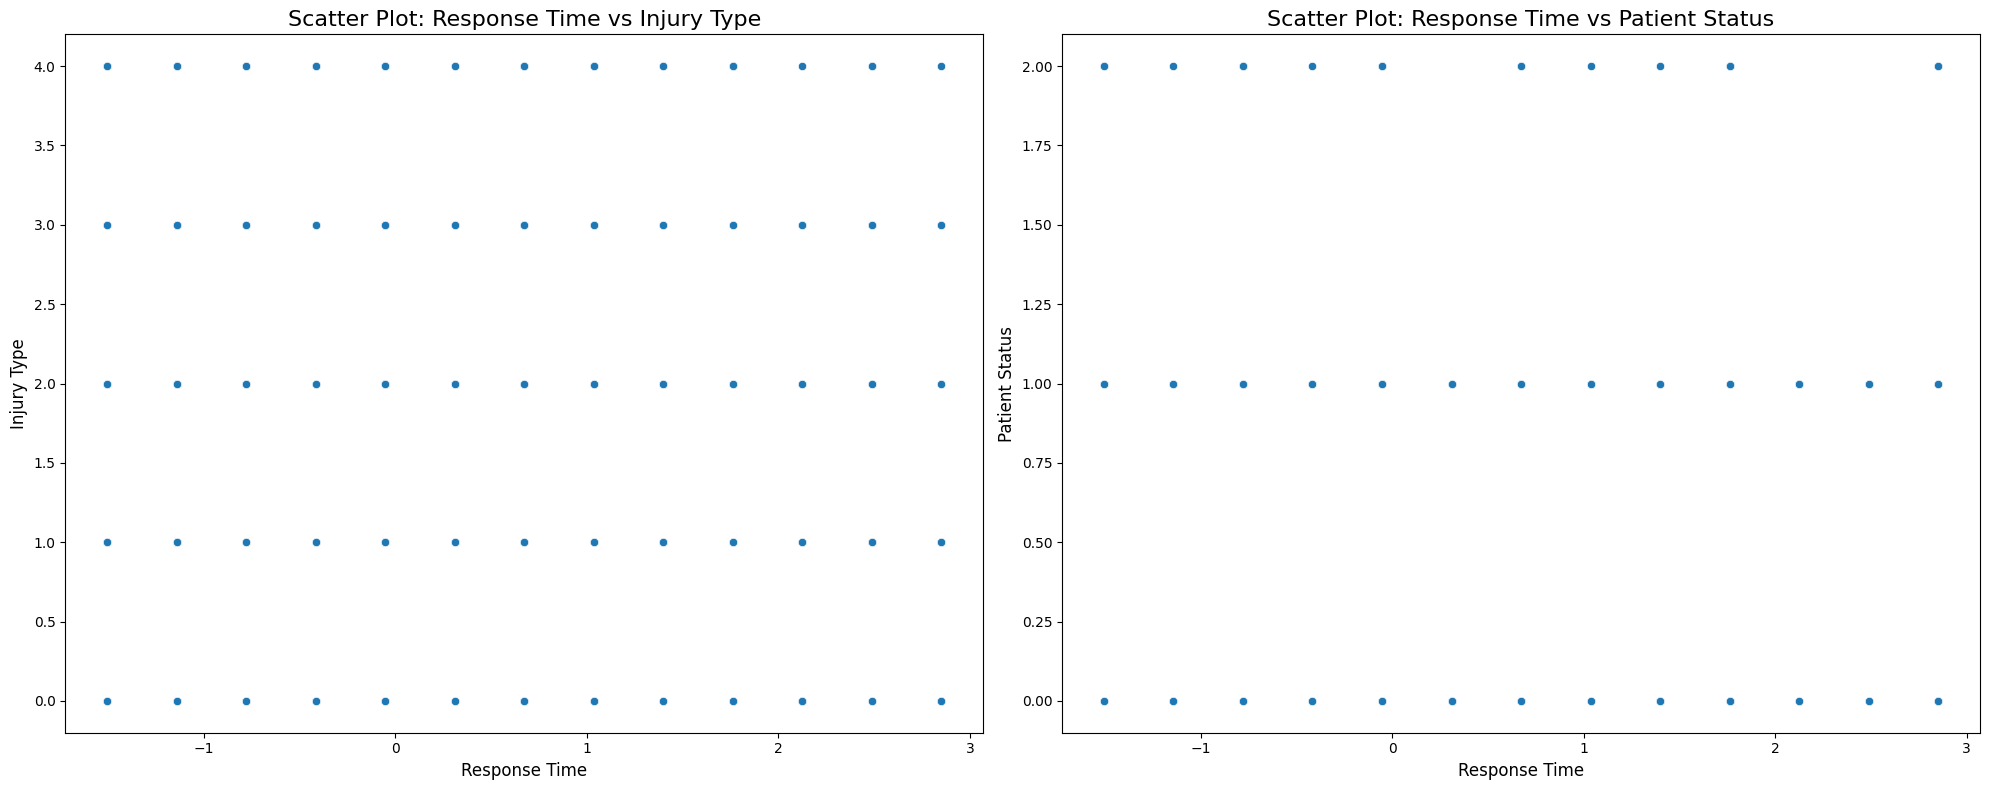

In [36]:
# Scatter plots for targets after PreProcessing
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Scatter plot for Injury Type
sns.scatterplot(data=df_cleaned, x='responsetime', y='InjuryType', ax=ax1)
ax1.set_title('Scatter Plot: Response Time vs Injury Type', fontsize=16)
ax1.set_xlabel('Response Time', fontsize=12)
ax1.set_ylabel('Injury Type', fontsize=12)

# Scatter plot for Patient Status
sns.scatterplot(data=df_cleaned, x='responsetime', y='PatientStatus', ax=ax2)
ax2.set_title('Scatter Plot: Response Time vs Patient Status', fontsize=16)
ax2.set_xlabel('Response Time', fontsize=12)
ax2.set_ylabel('Patient Status', fontsize=12)

plt.tight_layout()
plt.show()

**Splitting Data to Test & Train**

In [15]:
# Split data into training and testing sets for InjuryType
X_injury = df_cleaned.drop('InjuryType', axis=1)
y_injury = df_cleaned['InjuryType']
X_train_injury, X_test_injury, y_train_injury, y_test_injury = train_test_split(X_injury, y_injury, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Data split:")
print("Training set shape:", X_train_injury.shape)
print("Testing set shape:", X_test_injury.shape)

Data split:
Training set shape: (11637, 21513)
Testing set shape: (2910, 21513)


In [16]:
# Split data into training and testing sets for PatientStatus
X_patient = df_cleaned.drop('PatientStatus', axis=1)
y_patient = df_cleaned['PatientStatus']
X_train_patient, X_test_patient, y_train_patient, y_test_patient = train_test_split(X_patient, y_patient, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Data split:")
print("Training set shape:", X_train_patient.shape)
print("Testing set shape:", X_test_patient.shape)

Data split:
Training set shape: (11637, 21513)
Testing set shape: (2910, 21513)


**Storing solvers & max_iters**

In [17]:
# Initialize lists to store results
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
max_iters = [50, 100, 150, 200, 250, 300]
accuracy_scores_injury_solver = []
accuracy_scores_patient_solver = []
accuracy_scores_injury_max_iter = []
accuracy_scores_patient_max_iter = []

**Training & Evaluating the model for different solvers and max_iters**

In [51]:
# Train and evaluate models for different solvers
for solver in solvers:
    # Initialize and train Logistic Regression models
    model_injury = LogisticRegression(solver=solver, max_iter=100, random_state=42)
    model_patient = LogisticRegression(solver=solver, max_iter=100, random_state=42)

    model_injury.fit(X_train_injury, y_train_injury)
    model_patient.fit(X_train_patient, y_train_patient)

    # Make predictions on the test sets
    y_pred_injury = model_injury.predict(X_test_injury)
    y_pred_patient = model_patient.predict(X_test_patient)

    # Evaluate the models
    accuracy_injury = accuracy_score(y_test_injury, y_pred_injury)
    conf_matrix_injury = confusion_matrix(y_test_injury, y_pred_injury)
    precision_injury = precision_score(y_test_injury, y_pred_injury, average='weighted')
    recall_injury = recall_score(y_test_injury, y_pred_injury, average='weighted')
    f1_injury = f1_score(y_test_injury, y_pred_injury, average='weighted')

    accuracy_patient = accuracy_score(y_test_patient, y_pred_patient)
    conf_matrix_patient = confusion_matrix(y_test_patient, y_pred_patient)
    precision_patient = precision_score(y_test_patient, y_pred_patient, average='weighted')
    recall_patient = recall_score(y_test_patient, y_pred_patient, average='weighted')
    f1_patient = f1_score(y_test_patient, y_pred_patient, average='weighted')

    # Append accuracy scores to the lists
    accuracy_scores_injury_solver.append(accuracy_injury)
    accuracy_scores_patient_solver.append(accuracy_patient)

    # Print evaluation metrics for each solver
    print(f"Evaluation metrics for InjuryType prediction with solver '{solver}':")
    print(f"  Accuracy: {accuracy_injury:.4f}")
    print(f"  Confusion Matrix:\n {conf_matrix_injury}")
    print(f"  Precision: {precision_injury:.4f}")
    print(f"  Recall: {recall_injury:.4f}")
    print(f"  F1 Score: {f1_injury:.4f}")

    print(f"Evaluation metrics for PatientStatus prediction with solver '{solver}':")
    print(f"  Accuracy: {accuracy_patient:.4f}")
    print(f"  Confusion Matrix:\n {conf_matrix_patient}")
    print(f"  Precision: {precision_patient:.4f}")
    print(f"  Recall: {recall_patient:.4f}")
    print(f"  F1 Score: {f1_patient:.4f}")
    print("-" * 50)

Evaluation metrics for InjuryType prediction with solver 'lbfgs':
  Accuracy: 0.8076
  Confusion Matrix:
 [[   6  151    0    5    0]
 [   2 2324    0   26    0]
 [   1   22    0    0    0]
 [   0  336    0   20    0]
 [   0   16    0    1    0]]
  Precision: 0.7435
  Recall: 0.8076
  F1 Score: 0.7382
Evaluation metrics for PatientStatus prediction with solver 'lbfgs':
  Accuracy: 0.6838
  Confusion Matrix:
 [[1391  270    0]
 [ 642  599    0]
 [   7    1    0]]
  Precision: 0.6828
  Recall: 0.6838
  F1 Score: 0.6711
--------------------------------------------------
Evaluation metrics for InjuryType prediction with solver 'liblinear':
  Accuracy: 0.8086
  Confusion Matrix:
 [[   3  154    0    5    0]
 [   1 2331    0   20    0]
 [   0   22    0    1    0]
 [   0  337    0   19    0]
 [   0   16    0    1    0]]
  Precision: 0.7510
  Recall: 0.8086
  F1 Score: 0.7365
Evaluation metrics for PatientStatus prediction with solver 'liblinear':
  Accuracy: 0.6852
  Confusion Matrix:
 [[1396

In [ ]:
# Train and evaluate models for different max_iters
for max_iter in max_iters:
    # Initialize and train Logistic Regression models
    model_injury = LogisticRegression(solver='lbfgs', max_iter=max_iter, random_state=42)
    model_patient = LogisticRegression(solver='lbfgs', max_iter=max_iter, random_state=42)

    model_injury.fit(X_train_injury, y_train_injury)
    model_patient.fit(X_train_patient, y_train_patient)

    # Make predictions on the test sets
    y_pred_injury = model_injury.predict(X_test_injury)
    y_pred_patient = model_patient.predict(X_test_patient)

    # Evaluate the models
    accuracy_injury = accuracy_score(y_test_injury, y_pred_injury)
    conf_matrix_injury = confusion_matrix(y_test_injury, y_pred_injury)
    precision_injury = precision_score(y_test_injury, y_pred_injury, average='weighted')
    recall_injury = recall_score(y_test_injury, y_pred_injury, average='weighted')
    f1_injury = f1_score(y_test_injury, y_pred_injury, average='weighted')

    accuracy_patient = accuracy_score(y_test_patient, y_pred_patient)
    conf_matrix_patient = confusion_matrix(y_test_patient, y_pred_patient)
    precision_patient = precision_score(y_test_patient, y_pred_patient, average='weighted')
    recall_patient = recall_score(y_test_patient, y_pred_patient, average='weighted')
    f1_patient = f1_score(y_test_patient, y_pred_patient, average='weighted')

    # Append accuracy scores to the lists
    accuracy_scores_injury_max_iter.append(accuracy_injury)
    accuracy_scores_patient_max_iter.append(accuracy_patient)

    # Print evaluation metrics for each max_iter
    print(f"Evaluation metrics for InjuryType prediction with solver '{max_iter}':")
    print(f"  Accuracy: {accuracy_injury:.4f}")
    print(f"  Confusion Matrix:\n {conf_matrix_injury}")
    print(f"  Precision: {precision_injury:.4f}")
    print(f"  Recall: {recall_injury:.4f}")
    print(f"  F1 Score: {f1_injury:.4f}")

    print(f"Evaluation metrics for PatientStatus prediction with solver '{max_iter}':")
    print(f"  Accuracy: {accuracy_patient:.4f}")
    print(f"  Confusion Matrix:\n {conf_matrix_patient}")
    print(f"  Precision: {precision_patient:.4f}")
    print(f"  Recall: {recall_patient:.4f}")
    print(f"  F1 Score: {f1_patient:.4f}")
    print("-" * 50)

Evaluation metrics for InjuryType prediction with solver '50':
  Accuracy: 0.8041
  Confusion Matrix:
 [[   5  150    4    3    0]
 [   6 2312    2   32    0]
 [   1   20    0    2    0]
 [   1  332    0   23    0]
 [   0   17    0    0    0]]
  Precision: 0.7284
  Recall: 0.8041
  F1 Score: 0.7378
Evaluation metrics for PatientStatus prediction with solver '50':
  Accuracy: 0.6742
  Confusion Matrix:
 [[1347  314    0]
 [ 624  615    2]
 [   7    1    0]]
  Precision: 0.6707
  Recall: 0.6742
  F1 Score: 0.6642
--------------------------------------------------


In [ ]:
# Plot the learning curves
plt.figure(figsize=(12, 5))

# Accuracy vs Solver
plt.subplot(1, 2, 1)
plt.plot(solvers, accuracy_scores_injury_solver, marker='o', label='InjuryType')
plt.plot(solvers, accuracy_scores_patient_solver, marker='x', label='PatientStatus')
plt.xlabel('Solver')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Solver (max_iter=100)')
plt.legend()
plt.grid(True)

# Accuracy vs Max Iter
plt.subplot(1, 2, 2)
plt.plot(max_iters, accuracy_scores_injury_max_iter, marker='o', label='InjuryType')
plt.plot(max_iters, accuracy_scores_patient_max_iter, marker='x', label='PatientStatus')
plt.xlabel('Max Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Max Iterations (solver=lbfgs)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()